# Customer Churn Analysis – Exploratory Data Analysis (EDA)

## Problem Statement
Customer churn is a critical challenge for subscription-based businesses.
Retaining existing customers is often more cost-effective than acquiring new ones.

## Objective
The objective of this project is to perform Exploratory Data Analysis (EDA)
to identify key factors that influence customer churn and derive actionable
business insights.

## Goals
- Understand customer behavior patterns
- Identify churn-driving features
- Provide insights to support customer retention strategies


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/dataset/Customer Churn.csv')

In [ ]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


#Inspection

In [ ]:
df.shape

(7043, 21)

In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Insight
The dataset contains customer demographic, service usage, and billing
information along with the churn indicator.

## Why this matters
Understanding data structure and feature types is essential before
performing analysis or modeling.

## Business takeaway
A well-understood dataset ensures accurate analysis and prevents
misinterpretation of customer behavior.


#null value handling

In [ ]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


#Convert TotalCharges to Numeric

In [ ]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'], errors='coerce')

In [ ]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


#Replace null values of total charges

In [ ]:
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

In [ ]:
df['TotalCharges'].isna().sum()

np.int64(0)

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928
std,0.368612,24.559481,30.090047,2265.270398
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df['customerID'].duplicated().sum()

np.int64(0)

#Converting SeniorCitizen col in yes/no

In [ ]:
def convert(value):
  if value==1:
    return 'Yes'
  else:
    return 'No'

df['SeniorCitizen']=df['SeniorCitizen'].apply(convert)

In [ ]:
df.head(20)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,No,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,No,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,No,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,No,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,No,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [ ]:
df['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


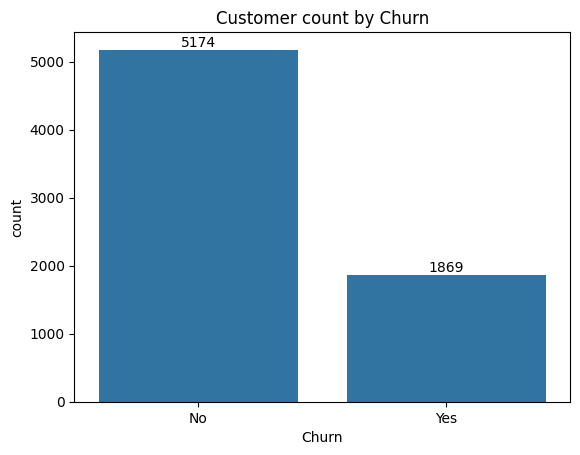

In [ ]:
ax=sns.countplot(x= df['Churn'])

ax.bar_label(ax.containers[0])
plt.title('Customer count by Churn')
plt.show()

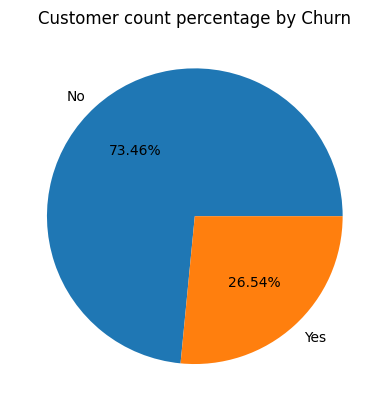

In [ ]:
plt.pie(df['Churn'].value_counts(), labels=df['Churn'].value_counts().index, autopct='%1.2f%%')
plt.title('Customer count percentage by Churn')
plt.show()

## Insight
A significant portion(26.54) of customers have churned, indicating a real
business problem rather than a rare event.

## Why this matters
Churn distribution helps assess class imbalance and guides
modeling and evaluation strategies.

## Business takeaway
Reducing churn even by a small percentage can lead to substantial
revenue improvement.


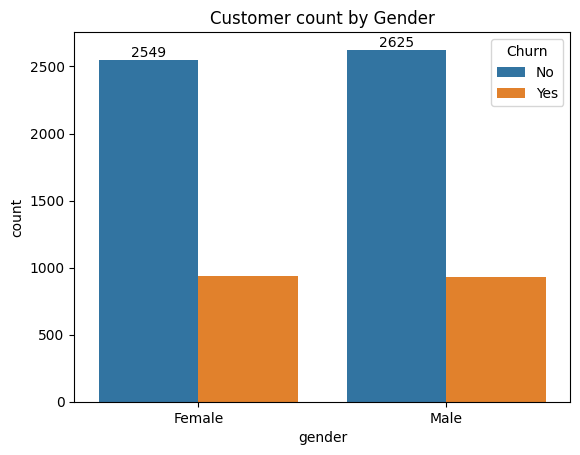

In [ ]:
gx=sns.countplot(x= df['gender'], hue=df['Churn'])
gx.bar_label(gx.containers[0])
plt.title('Customer count by Gender')
plt.show()

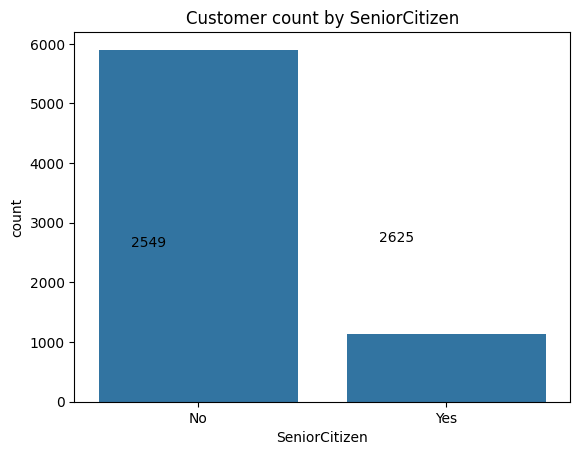

In [ ]:
sx=sns.countplot(x= df['SeniorCitizen'])
sx.bar_label(gx.containers[0])
plt.title('Customer count by SeniorCitizen')
plt.show()

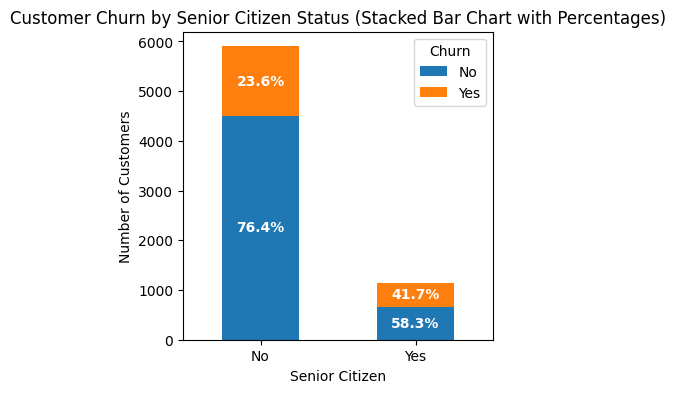

In [ ]:
churn_by_seniorcitizen = pd.crosstab(df['SeniorCitizen'], df['Churn'])
ax = churn_by_seniorcitizen.plot(kind='bar', stacked=True, figsize=(4,4))
plt.title('Customer Churn by Senior Citizen Status (Stacked Bar Chart with Percentages)')
plt.xlabel('Senior Citizen')
plt.ylabel('Number of Customers') # Bars still represent counts
plt.xticks(rotation=0)

# Calculate totals for percentage calculation
total_per_seniority = churn_by_seniorcitizen.sum(axis=1)

# Iterate through containers (representing Churn categories: 'No', 'Yes')
for i, container in enumerate(ax.containers):
    # Iterate through patches (individual bars within each container, representing SeniorCitizen categories)
    for j, patch in enumerate(container.patches):
        height = patch.get_height()
        if height > 0: # Only annotate non-zero bars
            # Get the SeniorCitizen group for this bar (index j)
            seniority_group_label = churn_by_seniorcitizen.index[j]
            # Get the total number of customers in this SeniorCitizen group
            total_customers_in_group = total_per_seniority[seniority_group_label]

            # Calculate percentage for this bar segment
            percentage = (height / total_customers_in_group) * 100

            ax.annotate(f'{percentage:.1f}%', # Format to one decimal place
                        xy=(patch.get_x() + patch.get_width() / 2, patch.get_y() + height / 2),
                        ha='center', va='center', color='white', weight='bold')

plt.show()

<Axes: xlabel='tenure', ylabel='Count'>

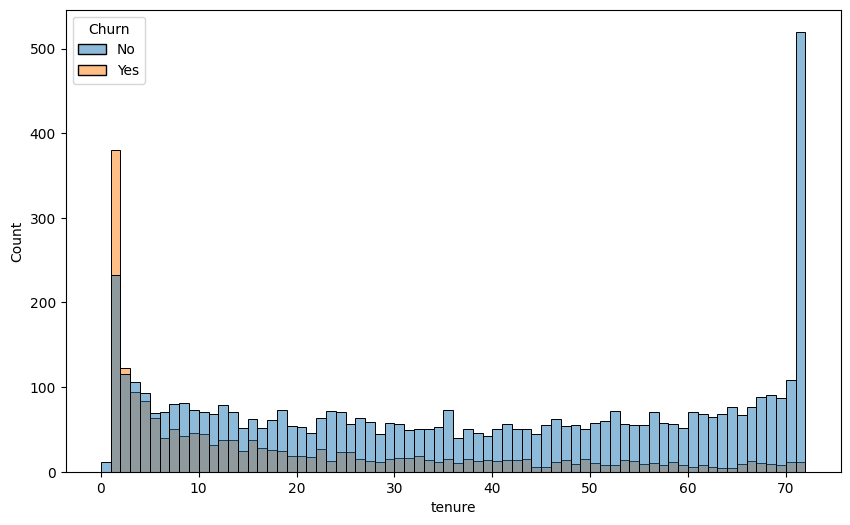

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(x=df['tenure'], bins=72, hue=df['Churn'])

## Insight
Customers with lower tenure show a much higher likelihood of churn,
while long-tenure customers tend to stay.

## Why this matters
Tenure reflects customer loyalty and satisfaction, making it a
strong churn predictor.

## Business takeaway
Early engagement and onboarding programs are critical to reduce
churn among new customers.


[Text(0, 0, '2220'), Text(0, 0, '1307'), Text(0, 0, '1647')]

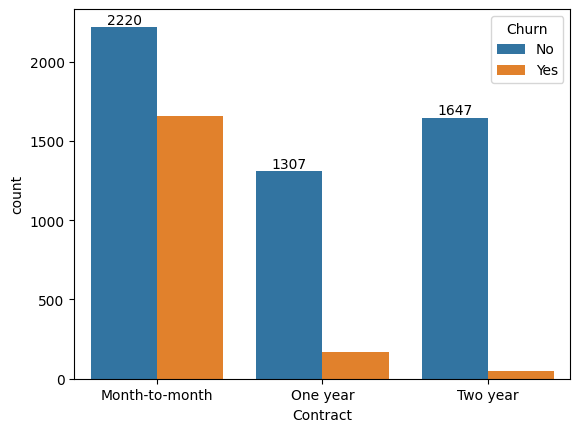

In [ ]:
cx=sns.countplot(x=df['Contract'], hue=df['Churn'])
cx.bar_label(cx.containers[0])

In [ ]:
df.groupby("Contract")["Churn"].value_counts(normalize=True) * 100

Contract        Churn
Month-to-month  No       57.290323
                Yes      42.709677
One year        No       88.730482
                Yes      11.269518
Two year        No       97.168142
                Yes       2.831858
Name: proportion, dtype: float64

## Insight
Customers on month-to-month contracts have significantly higher churn
compared to long-term contract customers.

## Why this matters
Contract type captures customer commitment and switching cost,
making it a strong churn indicator.

## Business takeaway
Encouraging customers to move to long-term contracts can reduce churn.


In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<Axes: >

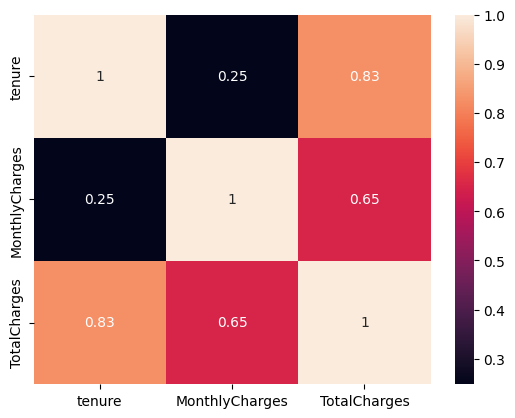

In [ ]:
sns.heatmap(df[['tenure','MonthlyCharges','TotalCharges']].corr(), annot=True)

## Insight
Tenure and total charges are strongly correlated, while monthly
charges show moderate influence on churn.

## Why this matters
Understanding relationships between numerical features helps
identify redundant and important variables.

## Business takeaway
Tenure-related metrics should be prioritized in churn prediction
and retention strategies.


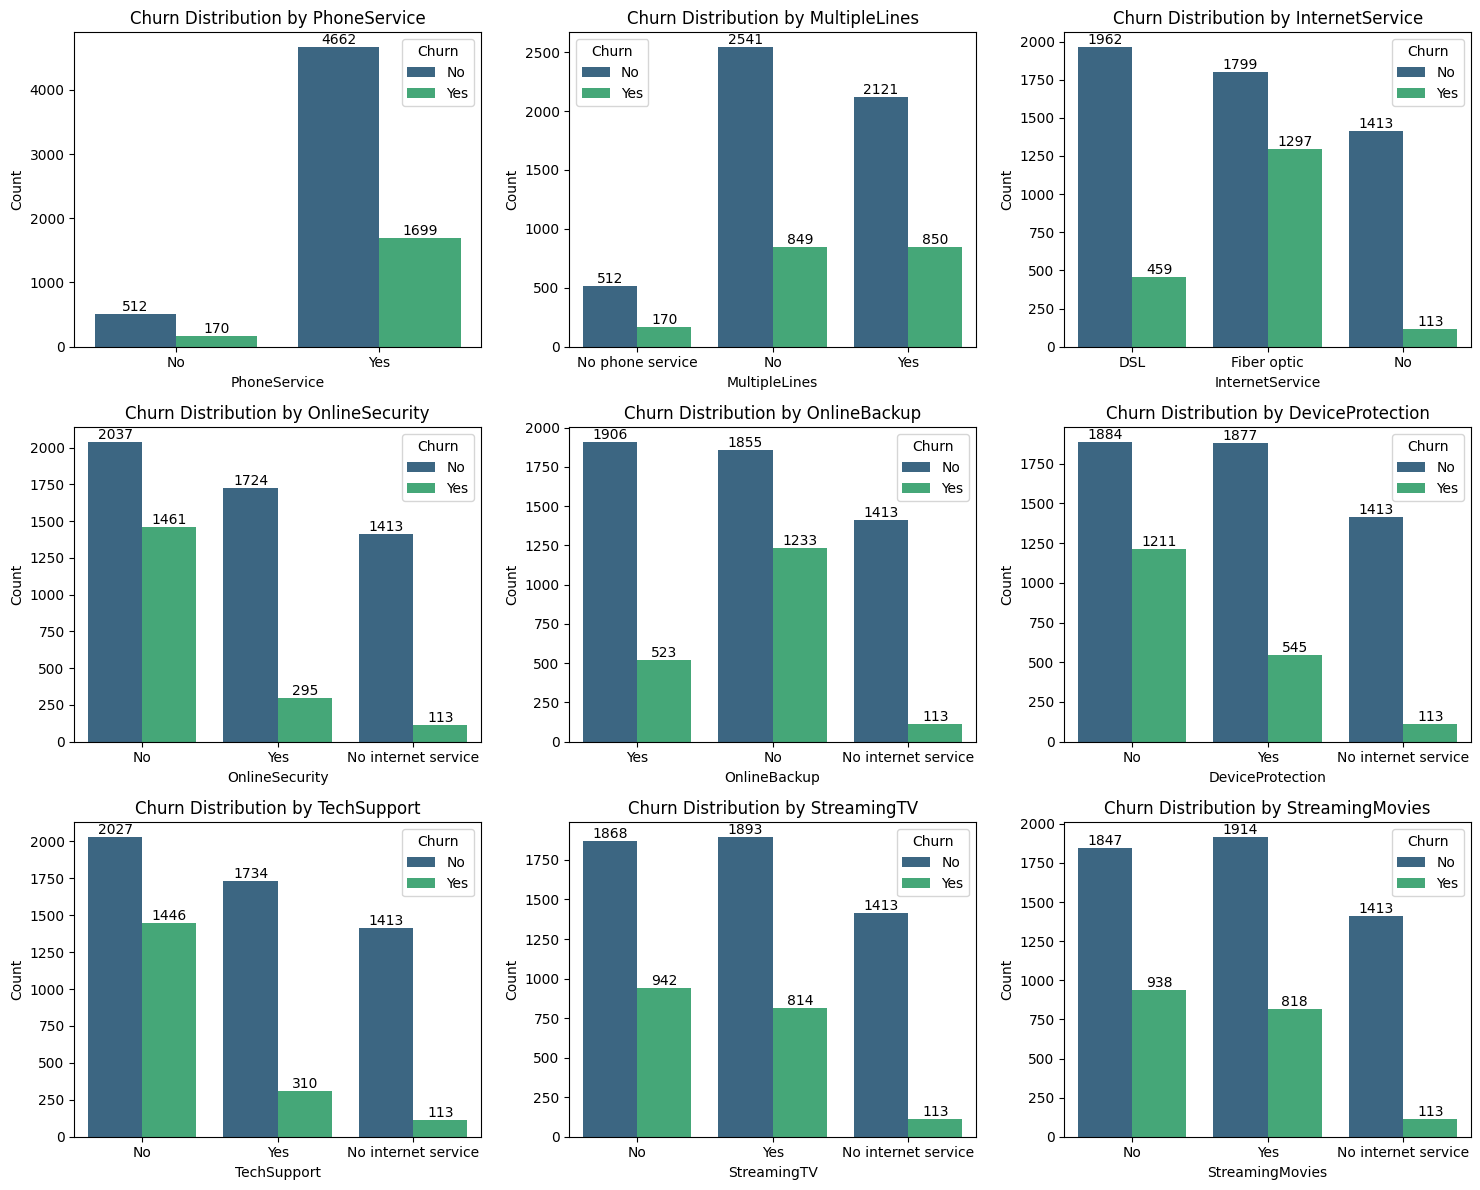

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of columns to plot
columns_to_plot = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Determine the number of rows and columns for the subplot grid
n_cols = 3
n_rows = (len(columns_to_plot) + n_cols - 1) // n_cols # Calculate rows needed

plt.figure(figsize=(n_cols * 5, n_rows * 4))

for i, col in enumerate(columns_to_plot):
    plt.subplot(n_rows, n_cols, i + 1)
    ax = sns.countplot(x=df[col], hue=df['Churn'], palette='viridis')
    ax.bar_label(ax.containers[0], fmt='%d') # Label bars for 'No' churn
    if len(ax.containers) > 1:
        ax.bar_label(ax.containers[1], fmt='%d') # Label bars for 'Yes' churn
    plt.title(f'Churn Distribution by {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
   # plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

### Analysis of Churn Distribution by Service Categories

**1. PhoneService:**
- Customers without `PhoneService` (`No phone service`) show a relatively lower churn rate compared to those with `PhoneService` (`Yes`).

**2. MultipleLines:**
- Among customers with `PhoneService`, those with `No` multiple lines churn slightly less than those with `Yes` multiple lines.

**3. InternetService:**
- Customers with `Fiber optic` internet service have a significantly higher churn rate compared to those with `DSL` or `No internet service`.
- `No internet service` has the lowest churn rate, indicating that these customers are very loyal.

**4. OnlineSecurity:**
- Customers without `OnlineSecurity` (`No`) have a much higher churn rate than those with `Yes` or `No internet service`.
- Having `OnlineSecurity` appears to be a strong factor in retaining customers.

**5. OnlineBackup:**
- Similar to `OnlineSecurity`, customers without `OnlineBackup` (`No`) exhibit a higher churn rate compared to those with `Yes` or `No internet service`.

**6. DeviceProtection:**
- `DeviceProtection` shows a similar trend where customers without this service (`No`) are more likely to churn.

**7. TechSupport:**
- Customers who do not have `TechSupport` (`No`) churn at a higher rate than those who do (`Yes`) or those without internet service.
- This suggests that reliable `TechSupport` is crucial for customer retention.

**8. StreamingTV:**
- The difference in churn rates between customers with and without `StreamingTV` is less pronounced than for security or support services, but customers without `StreamingTV` (`No`) still show a slightly higher churn.

**9. StreamingMovies:**
- Similar to `StreamingTV`, customers without `StreamingMovies` (`No`) have a marginally higher churn rate than those with the service (`Yes`).

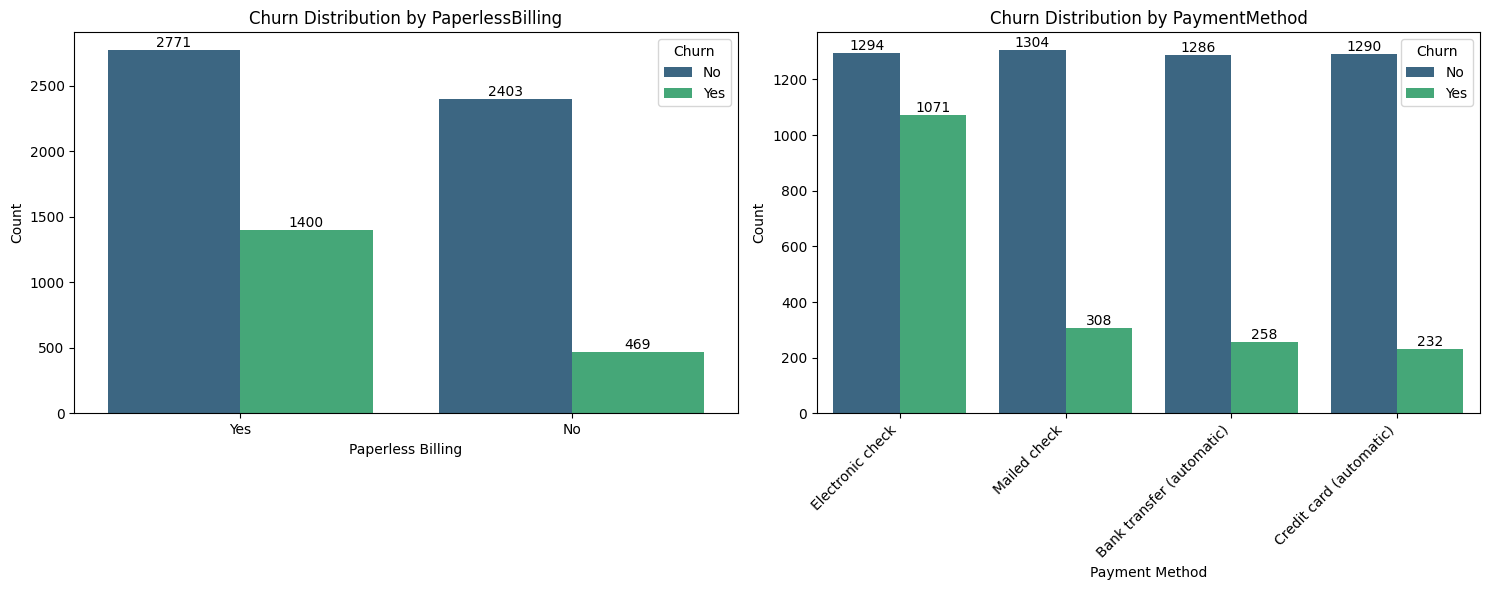

In [ ]:
plt.figure(figsize=(15, 6))

# Plot for PaperlessBilling
plt.subplot(1, 2, 1)
ax_paperless = sns.countplot(x=df['PaperlessBilling'], hue=df['Churn'], palette='viridis')
ax_paperless.bar_label(ax_paperless.containers[0], fmt='%d') # Label bars for 'No' churn
if len(ax_paperless.containers) > 1:
    ax_paperless.bar_label(ax_paperless.containers[1], fmt='%d') # Label bars for 'Yes' churn
plt.title('Churn Distribution by PaperlessBilling')
plt.xlabel('Paperless Billing')
plt.ylabel('Count')

# Plot for PaymentMethod
plt.subplot(1, 2, 2)
ax_payment = sns.countplot(x=df['PaymentMethod'], hue=df['Churn'], palette='viridis')
ax_payment.bar_label(ax_payment.containers[0], fmt='%d') # Label bars for 'No' churn
if len(ax_payment.containers) > 1:
    ax_payment.bar_label(ax_payment.containers[1], fmt='%d') # Label bars for 'Yes' churn
plt.title('Churn Distribution by PaymentMethod')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for readability

plt.tight_layout()
plt.show()

### Analysis of Churn Distribution by PaperlessBilling and PaymentMethod

**1. PaperlessBilling:**
- Customers who opt for `PaperlessBilling` (`Yes`) show a significantly higher churn rate compared to those who do not (`No`). This suggests that customers using paperless billing might be more engaged with digital services and potentially more prone to switching providers if dissatisfied, or perhaps it's a characteristic of a segment that is generally more volatile.

**2. PaymentMethod:**
- `Electronic check` users have the highest churn rate by a considerable margin. This payment method seems to be strongly associated with customers who churn.
- `Mailed check` and `Credit card (automatic)` users show lower churn rates, with `Bank transfer (automatic)` having the lowest churn rate among all payment methods.
- This indicates that customers using automatic payment methods (Credit card and Bank transfer) are more stable and less likely to churn, possibly due to the convenience or their long-term commitment.

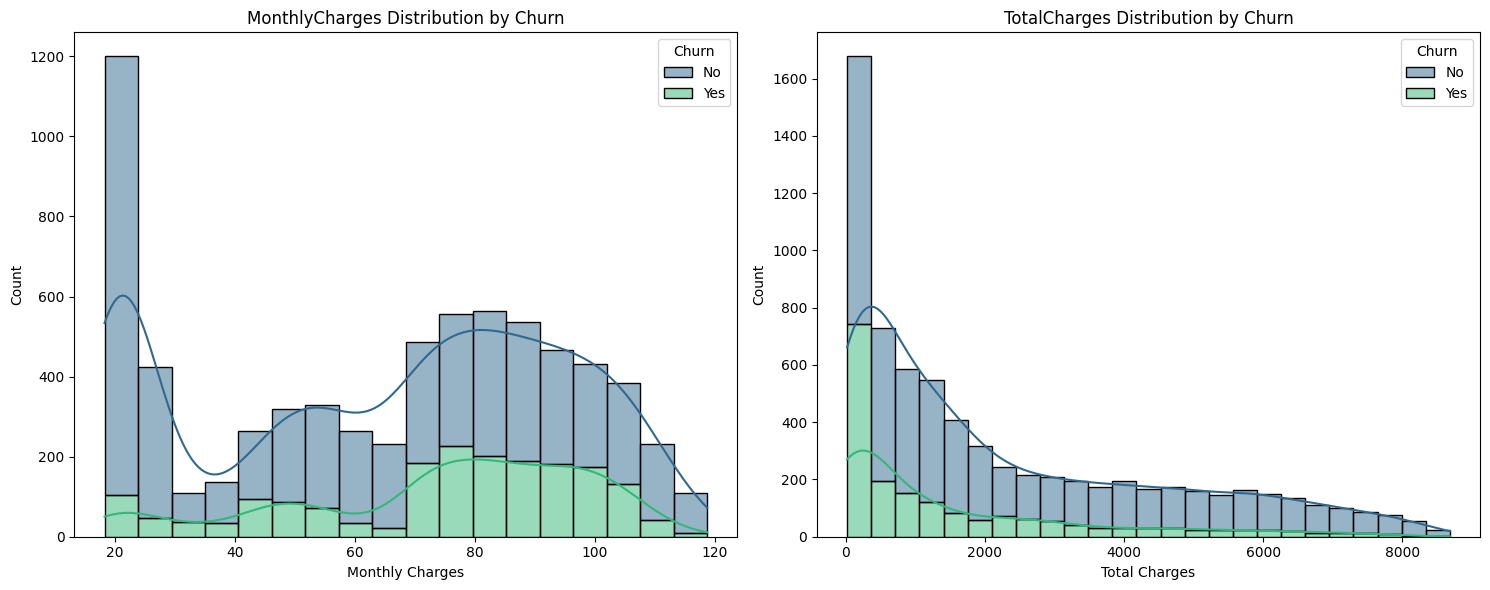

In [ ]:
plt.figure(figsize=(15, 6))

# Histogram for MonthlyCharges
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', multiple='stack', palette='viridis', kde=True)
plt.title('MonthlyCharges Distribution by Churn')
plt.xlabel('Monthly Charges')
plt.ylabel('Count')

# Histogram for TotalCharges
plt.subplot(1, 2, 2)
sns.histplot(data=df, x='TotalCharges', hue='Churn', multiple='stack', palette='viridis', kde=True)
plt.title('TotalCharges Distribution by Churn')
plt.xlabel('Total Charges')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

### Analysis of Churn Distribution by MonthlyCharges and TotalCharges

**1. MonthlyCharges:**
- The histogram for `MonthlyCharges` clearly shows that customers with higher monthly charges have a significantly greater tendency to churn. The 'Yes' churn bars are noticeably taller at the higher end of the monthly charges spectrum.
- Conversely, customers with very low monthly charges (e.g., below $25-$30) tend to have a lower churn rate, with the 'No' churn bars dominating this range.

**2. TotalCharges:**
- For `TotalCharges`, the distribution of churn is quite different. Many customers with low `TotalCharges` (indicating new customers or those with services for a short period) show a higher propensity to churn. This aligns with the observation that short-tenure customers are more likely to churn.
- As `TotalCharges` increase, representing longer customer relationships and higher overall spending, the proportion of churned customers (`Yes`) decreases relative to non-churned customers (`No`). This suggests that long-term, high-value customers are less likely to churn.

## Analyze Partner and Dependents

### Subtask:
Generate count plots to visualize the distribution of 'Partner' and 'Dependents' against 'Churn'.


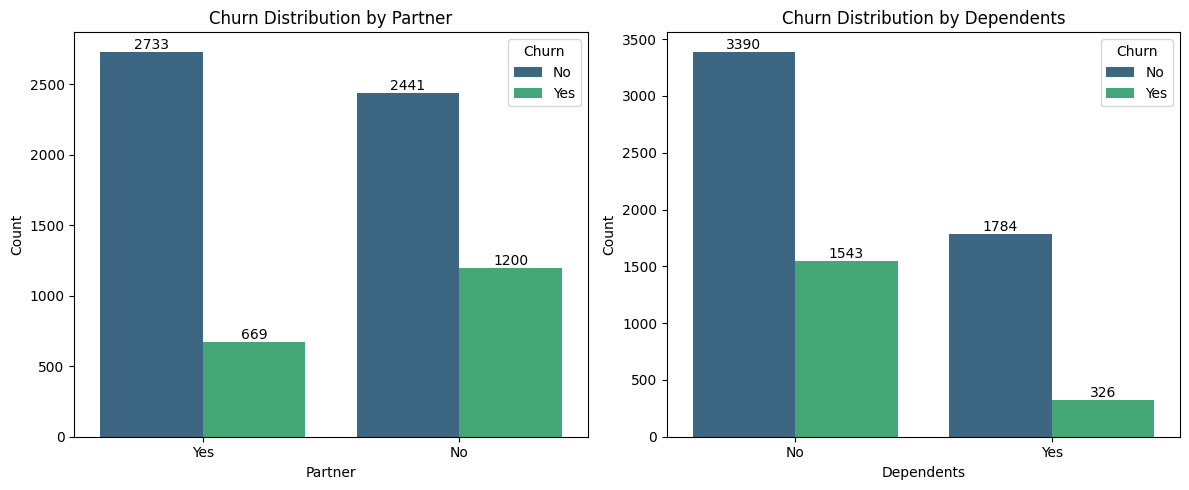

In [ ]:
plt.figure(figsize=(12, 5))

# Plot for Partner
plt.subplot(1, 2, 1)
ax_partner = sns.countplot(x=df['Partner'], hue=df['Churn'], palette='viridis')
ax_partner.bar_label(ax_partner.containers[0], fmt='%d') # Label bars for 'No' churn
if len(ax_partner.containers) > 1:
    ax_partner.bar_label(ax_partner.containers[1], fmt='%d') # Label bars for 'Yes' churn
plt.title('Churn Distribution by Partner')
plt.xlabel('Partner')
plt.ylabel('Count')

# Plot for Dependents
plt.subplot(1, 2, 2)
ax_dependents = sns.countplot(x=df['Dependents'], hue=df['Churn'], palette='viridis')
ax_dependents.bar_label(ax_dependents.containers[0], fmt='%d') # Label bars for 'No' churn
if len(ax_dependents.containers) > 1:
    ax_dependents.bar_label(ax_dependents.containers[1], fmt='%d') # Label bars for 'Yes' churn
plt.title('Churn Distribution by Dependents')
plt.xlabel('Dependents')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

### Analysis of Churn Distribution by Partner and Dependents

**1. Partner:**
- Customers who do not have a `Partner` (`No`) show a higher propensity to churn compared to those who do (`Yes`). This suggests that customers with a partner might have a more stable household situation or shared services, making them less likely to switch providers.

**2. Dependents:**
- A similar trend is observed with `Dependents`. Customers without `Dependents` (`No`) have a significantly higher churn rate than those with `Dependents` (`Yes`). Having dependents often implies a more established household and potentially a greater reliance on continuous services, contributing to lower churn.

### Importance for Churn
- **Household Stability**: The presence of a partner and/or dependents often indicates a more stable household structure. Such customers might be less prone to making frequent changes to their utility or service providers due to the added complexity and potential disruption to other household members.
- **Shared Responsibility/Usage**: For customers with partners or dependents, service usage might be shared, increasing the perceived value and reducing the likelihood of cancellation.

### Business Takeaways
- **Targeted Retention**: Identify customers without a partner or dependents as a higher-risk group for churn. Tailor retention efforts, promotions, or loyalty programs specifically for these segments.
- **Family-Oriented Bundles**: Consider offering family-oriented plans or bundles that cater to households with multiple users or dependents, which could increase stickiness and reduce churn among these valuable customer groups.
- **Communication Strategy**: When communicating with customers, acknowledge their household status (partner, dependents) where appropriate, to build a sense of personalized service and commitment.

## Summary:

### Q&A
The key insights gained from the visualizations concerning customer churn are:
*   Customers who opt for paperless billing show a significantly higher churn rate compared to those who do not.
*   Customers using 'Electronic check' as a payment method have the highest churn rate, while those using 'Bank transfer (automatic)' or 'Credit card (automatic)' tend to have lower churn rates.
*   Customers with higher monthly charges are more prone to churn.
*   Customers with lower total charges (indicating newer customers or those with services for a shorter period) exhibit a higher propensity to churn.

### Data Analysis Key Findings
*   **Paperless Billing**: Customers utilizing paperless billing ('Yes') show a significantly higher churn rate compared to those not using it ('No').
*   **Payment Method**: 'Electronic check' is strongly associated with churn, having the highest churn rate among all payment methods. Conversely, automatic payment methods like 'Bank transfer (automatic)' and 'Credit card (automatic)' are associated with lower churn rates.
*   **Monthly Charges**: A greater tendency to churn is observed among customers with higher monthly charges. Conversely, customers with very low monthly charges (e.g., below \$25-\$30) have a lower churn rate.
*   **Total Charges**: Customers with low total charges (suggesting newer customers or those with shorter tenure) have a higher propensity to churn. As total charges increase, indicating longer customer relationships, the proportion of churned customers decreases.

### Insights or Next Steps
*   Investigate the reasons behind the high churn rate among 'PaperlessBilling' users and 'Electronic check' payment method users, potentially offering incentives or alternative payment options.
*   Develop retention strategies specifically targeting new customers or those with lower total charges, as they appear to be at higher risk of churning.
